<a href="https://colab.research.google.com/github/varuncj02/ML-Projects/blob/master/demandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Bike Sharing Predictive Model using regression trees as part of me testing my machine learning project.

We will take a look at regression decision trees and regression decision trees


In [22]:
# Author : Varun Joshi
# Trying to figure out the number of bikes in every city basically

from google.colab import files
uploaded = files.upload()

Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv


DataSet has two files hour.csv and day.csv - Only using hour.csv file for this one.

Decision Tree :
Keep splitting into branches till the terminal leaf is hit


In [24]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Reading data
data = pd.read_csv('hour.csv', sep =',')

In [25]:
#Seperating the Data
seasonMap = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weatherMap = {1: " Clear + Few clouds + Party cloudy",\
              2: " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
              3: " Light Snow, Light Rain + Thunderstorms + Scattered clouds, Light Rain + Scattered Rain " ,\
              4: " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog "
              }

data["date"] = data.dteday.apply(lambda x : x.split()[0])
data["weekday"] = data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, 
                                                                        "%Y-%m-%d").weekday()])
data['season'] = data.season.map(seasonMap)
data['weather'] = data.weathersit.map(weatherMap)

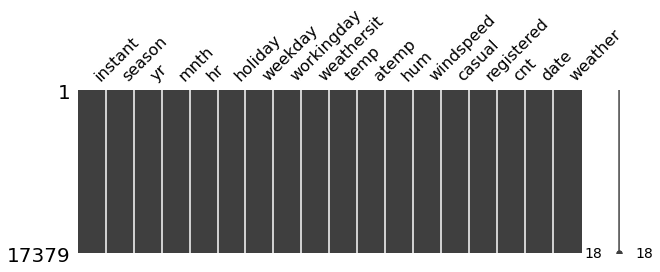

In [26]:
#To look at all the values
categoryList = ["hr", "weekday", "mnth", "season", "weather", "holiday", "workingday"]
for var in categoryList:
  data[var] = data[var].astype("category")

data = data.drop(["dteday"], axis=1)

#Detecting any missing piece of data
msno.matrix(data, figsize = (10,3))

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot on Count/Working Day Distribution')]

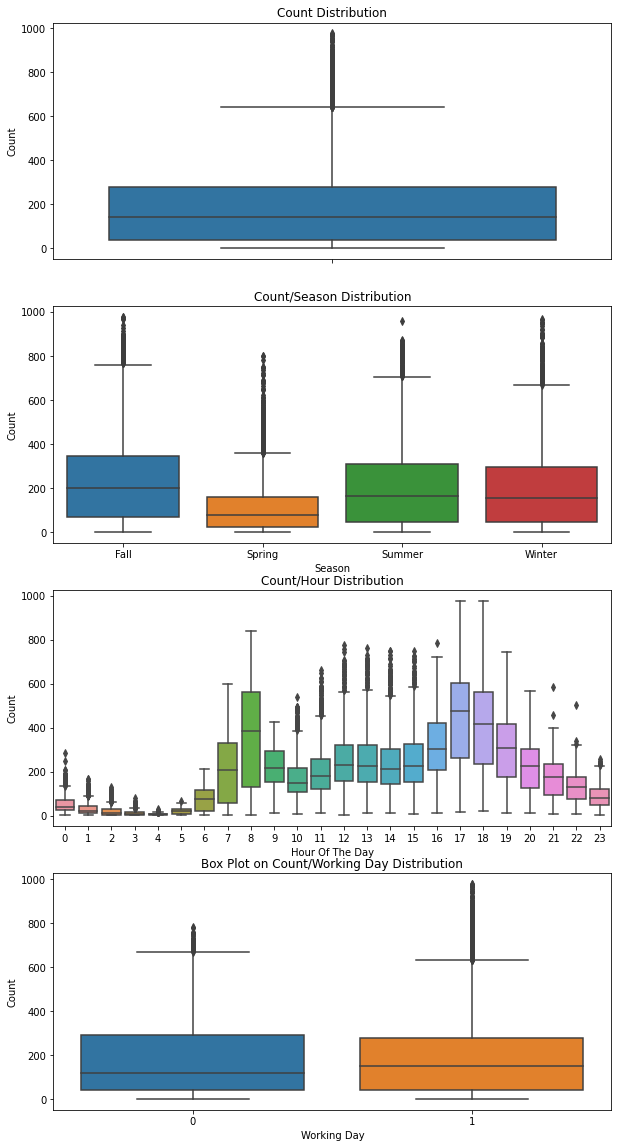

In [28]:
#Outlier Detection

fig, axes = plt.subplots(nrows = 4, ncols = 1)
fig.set_size_inches(10, 20)
sn.boxplot(data = data, y = "cnt", orient = "v", ax = axes[0])
sn.boxplot(data = data, y = "cnt", x = "season", orient = "v", ax = axes[1])
sn.boxplot(data = data, y = "cnt", x = "hr", orient = "v", ax = axes[2])
sn.boxplot(data = data, y = "cnt", x = "workingday", orient = "v", ax = axes[3])
axes[0].set(ylabel ='Count', title="Count Distribution")
axes[1].set(xlabel ='Season', ylabel ='Count', title = "Count/Season Distribution")
axes[2].set(xlabel ='Hour Of The Day', ylabel ='Count', title="Count/Hour Distribution")
axes[3].set(xlabel ='Working Day', ylabel = 'Count', title = "Box Plot on Count/Working Day Distribution")

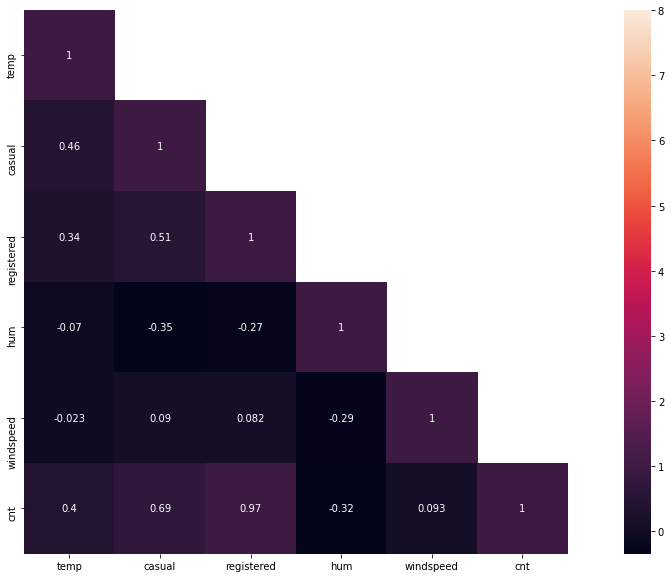

In [29]:
# Correlation Analysis
# Checking correlation between the different features 

corrMatrix = data[["temp", "casual", "registered", "hum", "windspeed", "cnt"]].corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sn.heatmap(corrMatrix, mask = mask, vmax = 8, square = True, annot = True)

Observation: Registered and Casual have high correlation and can corrupt the model.

ToDo: Implement the Random Regressor Model from sklearn and train the model using the features chosen from the above feature engineering

In [ ]:
#